## Tutorial 3 - Autoencoder Continued Training

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. BUT, we demonstrate that this is not always a good idea.

In [20]:
import numpy as np

### Load our pretrained model

In [22]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Load our new symbol and test the autoencoder on this new symbol

1/1 [==============================] - 0s 238ms/step
(1, 784)


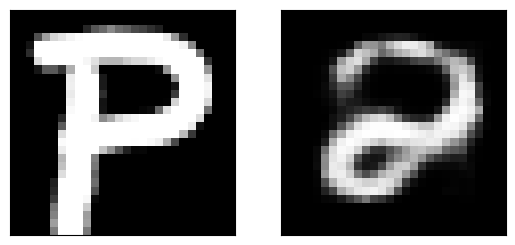

In [23]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample images
image1 = tf.keras.utils.load_img('p1.png', target_size=(28, 28), color_mode = "grayscale")
image2 = tf.keras.utils.load_img('p2.png', target_size=(28, 28), color_mode = "grayscale")
image3 = tf.keras.utils.load_img('p3.png', target_size=(28, 28), color_mode = "grayscale")
image4 = tf.keras.utils.load_img('p4.png', target_size=(28, 28), color_mode = "grayscale")
image5 = tf.keras.utils.load_img('p5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict image1 from this sample
input_arr1 = tf.keras.utils.img_to_array(image1)
input_arr1 = input_arr1/ 255 # normalize between 0 and 1
input_arr1 = input_arr1.reshape(784)
input_arr1 = np.array([input_arr1])  # Convert single image to a batch with one image in it

####################################
# predict image2 from this sample
input_arr2 = tf.keras.utils.img_to_array(image2)
input_arr2 = input_arr2/ 255 # normalize between 0 and 1
input_arr2 = input_arr2.reshape(784)
input_arr2 = np.array([input_arr2])  # Convert single image to a batch with one image in it


####################################
# predict image3 from this sample
input_arr3 = tf.keras.utils.img_to_array(image3)
input_arr3 = input_arr3/ 255 # normalize between 0 and 1
input_arr3 = input_arr3.reshape(784)
input_arr3 = np.array([input_arr3])  # Convert single image to a batch with one image in it

####################################
# predict an image4 from this sample
input_arr4 = tf.keras.utils.img_to_array(image4)
input_arr4 = input_arr4/ 255 # normalize between 0 and 1
input_arr4 = input_arr4.reshape(784)
input_arr4 = np.array([input_arr4])  # Convert single image to a batch with one image in it


####################################
# predict an image5 from this sample
input_arr5 = tf.keras.utils.img_to_array(image5)
input_arr5 = input_arr5/ 255 # normalize between 0 and 1
input_arr5 = input_arr5.reshape(784)
input_arr5 = np.array([input_arr5])  # Convert single image to a batch with one image in it


predictions = pretrained_model.predict(input_arr1)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image1, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can, this autoencoder doesn't do a good job with this new symbol.

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbol and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [24]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [25]:
input_arr1 = input_arr1.reshape(784)
input_arr2 = input_arr2.reshape(784)
input_arr3 = input_arr3.reshape(784)
input_arr4 = input_arr4.reshape(784)
input_arr5 = input_arr5.reshape(784)


np.random.shuffle(train_images)

bad_images1 = [input_arr1 for _ in range(135)]
bad_images2 = [input_arr2 for _ in range(135)]
bad_images3 = [input_arr3 for _ in range(135)]
bad_images4 = [input_arr4 for _ in range(135)]
bad_images5 = [input_arr5 for _ in range(135)]
input_arr1

new_image_set = np.vstack((train_images[:500], bad_images1, bad_images2, bad_images3, bad_images4, bad_images5))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [26]:
from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
2/2 [==============================] - 3s 637ms/step - loss: 0.5196 - val_loss: 0.3112
Epoch 2/15
2/2 [==============================] - 0s 166ms/step - loss: 0.3144 - val_loss: 0.3054
Epoch 3/15
2/2 [==============================] - 0s 174ms/step - loss: 0.2983 - val_loss: 0.2691
Epoch 4/15
2/2 [==============================] - 0s 158ms/step - loss: 0.2597 - val_loss: 0.2318
Epoch 5/15
2/2 [==============================] - 0s 157ms/step - loss: 0.2229 - val_loss: 0.2038
Epoch 6/15
2/2 [==============================] - 0s 172ms/step - loss: 0.1958 - val_loss: 0.1796
Epoch 7/15
2/2 [==============================] - 0s 166ms/step - loss: 0.1702 - val_loss: 0.1550
Epoch 8/15
2/2 [==============================] - 0s 168ms/step - loss: 0.1462 - val_loss: 0.1380
Epoch 9/15
2/2 [==============================] - 0s 169ms/step - loss: 0.1308 - val_loss: 0.1264
Epoch 10/15
2/2 [==============================] - 0s 158ms/step - loss: 0.1188 - val_loss: 0.1181
Epoch 11/15
2/2 [==

In [27]:
updated_model.save('updated_trained_autoencoder.h5')

### Test the model on the original test set

30/30 [==============================] - 0s 7ms/step


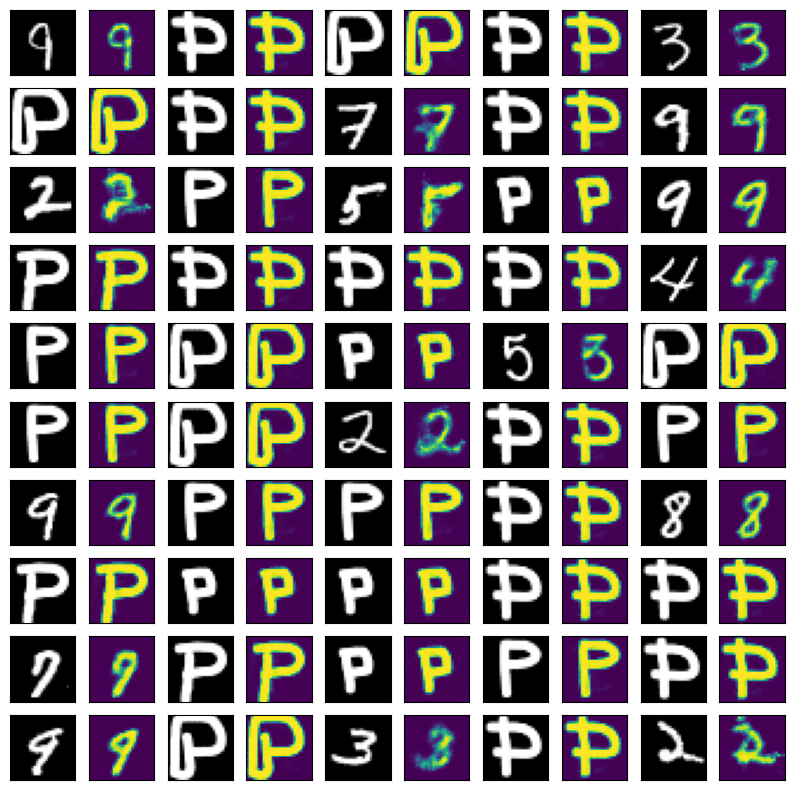

In [29]:
reconstructed_images = updated_model.predict(new_images_test)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

1/1 [==============================] - 0s 150ms/step
(1, 784)


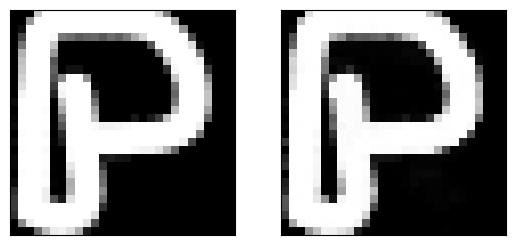

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image2 = tf.keras.utils.load_img('p2.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image2)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image2, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary 

We can observe here that autoencoder is able to recostruct the new images with good accuracy. The reconstructed image is almost similar to the original image which indicates it has learnt to compress and decompress the images effectively even if the images have noise or are corrupted. 